In [19]:
%matplotlib notebook
import scipy.io as scio
from scipy import interpolate
import pylab, socket
import numpy as np
import matplotlib.pyplot as plt
import glob,os
import sys,csaps
import pandas as pd
import matplotlib as mpl
from tikzplotlib import save as tikz_save
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['ytick.labelsize'] = 16;
mpl.rcParams['font.family'] = 'serif';
mpl.rcParams['axes.labelsize'] = 16
colorsk = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
#A = np.loadtxt('crisis3.csv',delimiter=' ',skiprows=1,dtype='string')[:]

A = pd.read_csv('crisis3.csv',decimal=',')

In [3]:
A

,x,Curve1
0,1.2783,1.4453
1,1.4335,1.7589
2,1.9887,2.5428
3,3.0940,3.9581
4,4.0867,7.3090
5,4.9737,13.1670
6,7.0140,26.1750
7,20.6620,191.1000
8,31.6230,290.2500
9,35.4620,269.7900


In [4]:
data =  A.to_numpy()

In [5]:
#data = []
#for Ai in A:
#    A2 = Ai.replace('"','').split(',')
#    x1 = np.float(A2[0])+np.float(A2[1])/10**len(A2[1])
#    y1 = np.float(A2[2])+np.float(A2[3])/10**len(A2[3])
#    data.append((x1,y1))
    #raise ValueError()
#data = np.asarray(data)

In [6]:
ind_max1 = data[:-10,1].argmax()
ind_min1 = data[10:,1].argmin()+10

p1 = np.polyfit(data[:,0],data[:,1],7)
temps =np.linspace(data[0,0],data[-1,0],100)
curva1 = np.poly1d(p1)

<IPython.core.display.Javascript object>


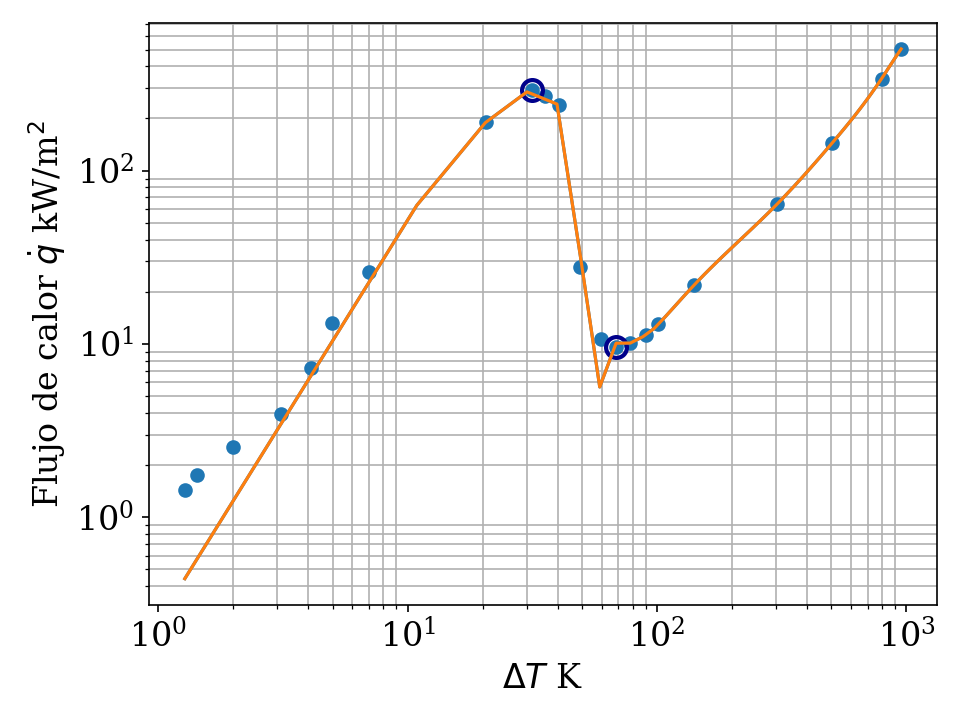

In [40]:
fig0,ax0 = plt.subplots()
ax0.loglog(data[:,0],data[:,1],'o',linestyle='',markerfacecolor=colorsk[0],markeredgecolor=colorsk[0],color='k',linewidth=0.2)
ax0.loglog(data[ind_max1,0],data[ind_max1,1],color='darkblue',marker='o',markersize=10,markerfacecolor='none',markeredgewidth=2)
ax0.loglog(data[ind_min1,0],data[ind_min1,1],color='darkblue',marker='o',markersize=10,markerfacecolor='none',markeredgewidth=2)
ax0.grid(which='minor')
ax0.set_xlabel(r'$\Delta T$ K')
ax0.set_ylabel(r'Flujo de calor $\dot q$ kW/m$^2$')
fig0.tight_layout()
#tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/ebullicion/tikzs/curva_ebullicion1.tikz')

#fig0.savefig('curva_ebull1.png')


In [42]:
delta_ts = np.linspace(data[0,0],data[-1,0],100)
qs = csaps.csaps(data[:,0],data[:,1],delta_ts,smooth=.2)


ax0.plot(delta_ts,qs)

In [29]:
csaps.csaps?

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import csaps

np.random.seed(1234)

x = np.linspace(-5., 5., 25)
y = np.exp(-(x/2.5)**2) + (np.random.rand(25) - 0.2) * 0.3

sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=0.85)

xs = np.linspace(x[0], x[-1], 150)
ys = sp(xs)

plt.plot(x, y, 'o', xs, ys, '-')
plt.show()

AttributeError: module 'csaps' has no attribute 'UnivariateCubicSmoothingSpline'

In [67]:
csaps.

9